<a href="https://colab.research.google.com/github/dbsdlsdud/AIStudy24/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

올바른 결과 도출을 위해서 데이터를 사용하기 전에 데이터 전처리 과정을 거친다.

전처리 과정을 거친 데이터로 훈련했을 때의 차이를 알고 표준점수로 특성의 스케일 변환 해보자.

만약 길이가 25cm이고 무게가 150g이면 도미인데, 빙어로 결론이 나왔다.

In [44]:
# 앞쪽 35개 도미(1), 뒷쪽 14개 빙어(0) -> 총 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np  # 넘파이 배열용 파이썬 라이브러리
np.column_stack(([1,2,3],[4,5,6]))  # .column(열) stack(쌓는다)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [45]:
fish_data = np.column_stack((fish_length, fish_weight)) # fish_data 변수에 2차원 배열을 넣는다 (길이, 무게)
print(fish_data[:5])    # 앞쪽 5개를 미리보기 해본다.

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [98]:
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [46]:
# 정답파일 생성
print(np.ones(5))   # 1 5개

[1. 1. 1. 1. 1.]


In [47]:
print(np.zeros(10)) # 0 10개

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [99]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))    # concatenate : 1차원 배열 (1이 35개, 0이 14개)
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [50]:
from sklearn.model_selection import train_test_split
# sklearn.model_selection : 데이터 분할에 사용
# train_test_split 학습용 데이터, 테스트용 데이터로 나누는 함수
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)
print(train_input.shape, test_input.shape)
# train_input : 훈련용 입력값, test_input : 테스트용 입력값, random_state : 시드 값을 42로 지정하고 랜덤 적용(수업용)
# train_target : 훈련용 정답, test_target 테스트용 정답, stratify : 타겟값을 넣어줌(target의 class비율을 유지한 채 데이터셋을 split한다.)

(36, 2) (13, 2)


In [71]:
print(test_input)

[[ 11.    9.7]
 [ 11.8   9.9]
 [ 29.7 450. ]
 [ 11.8  10. ]
 [ 26.5 340. ]
 [ 12.4  13.4]
 [ 34.  685. ]
 [ 34.  575. ]
 [ 38.5 920. ]
 [ 35.  680. ]
 [ 26.3 290. ]
 [ 31.  500. ]
 [ 41.  950. ]]


In [72]:
print(train_input)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]


In [51]:
print(train_target.shape, test_target.shape)    # 결과가 튜플로 나온다.(CR만 된다.)

(36,) (13,)


In [73]:
print(train_target)

[1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1.]


In [52]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


In [53]:
from sklearn.neighbors import KNeighborsClassifier  # k-이웃 근접 알고리즘

kn = KNeighborsClassifier() # 객체 생성
kn.fit(train_input, train_target)   # 훈련시작 (트레이닝입력, 트레이닝정답)

KNeighborsClassifier()

In [54]:
kn.score(test_input, test_target)   #평가시작 (테스트입력, 테스트정답)

1.0

In [55]:
# predict : 예측 메소드
print(kn.predict([[25,150]]))   # 도미 25cm, 150g 처리 결과 -> 0 (빙어)

[0.]


In [74]:
train_input[:,0]

array([29.7, 12.2, 33. , 11.3, 39.5, 29. , 36. , 36. , 31. , 35. , 37. ,
       11.2, 34.5, 12. , 29. , 33. , 30.7, 38.5, 33.5, 14.3, 31.5, 25.4,
        9.8, 32. , 10.5, 33.5, 10.6, 35. , 32. , 35. , 13. , 30. , 32. ,
       15. , 30. , 41. ])

In [75]:
train_input[:,1]

array([ 500. ,   12.2,  700. ,    8.7,  925. ,  430. ,  714. ,  850. ,
        475. ,  720. , 1000. ,    9.8,  620. ,    9.8,  363. ,  700. ,
        500. ,  955. ,  650. ,   19.7,  500. ,  242. ,    6.7,  600. ,
          7.5,  610. ,    7. ,  700. ,  600. ,  725. ,   12.2,  450. ,
        340. ,   19.9,  390. ,  975. ])

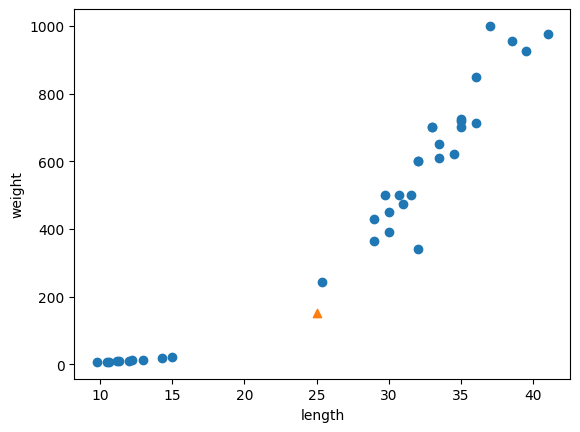

In [80]:
# 그래프로 확인해보기
import matplotlib.pyplot as plt
# scatter() : ()안에 값을 해당 위치에 기본 마커로 표시
plt.scatter(train_input[:,0], train_input[:,1]) # (train_input[:,길이], train_input[:,무게])
plt.scatter(25,150,marker='^')  # (25,150 : 알고 싶은 값, marker = '^' : 삼각형표시)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 결론 X와 Y축 비율이 다르기에 정확한 그래프로 판단할 수 없다.
# k-근접 이웃 알고리즘은 주변에 있는 5개를 보기 때문에 좀 더 알아볼 필요가 있다.

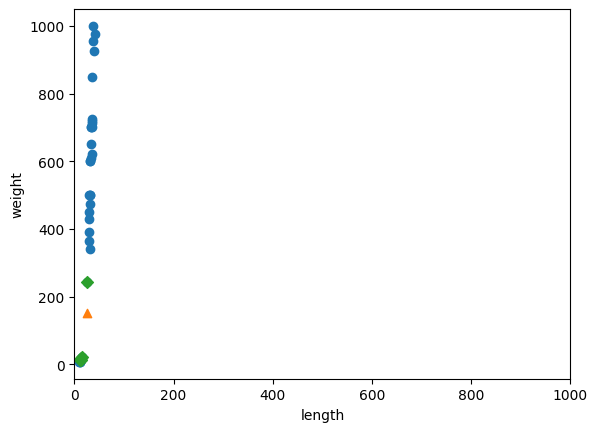

In [57]:
distances, indexes = kn.kneighbors([[25,150]])    # 내가 알고싶은 값의 거리와 인덱스

plt.scatter(train_input[:,0],train_input[:,1])  # 입력데이터 값
plt.scatter(25,150,marker='^')  # 알고 싶은 값
plt.scatter(train_input[indexes,0],train_input[indexes,1],marker='D')   # 이웃 값
plt.xlim((0,1000))  # x축 범위를 0~1000까지 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()  # 녹색으로 25,150에 대한 이웃이 누군지 파악된다.

In [88]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 29. , 363. ],
        [ 30. , 390. ],
        [ 32. , 340. ],
        [ 29. , 430. ]]])

In [90]:
train_input[indexes,0]

array([[25.4, 29. , 30. , 32. , 29. ]])

In [91]:
train_input[indexes,1]

array([[242., 363., 390., 340., 430.]])

In [93]:
print(train_input)

[[  29.7  500. ]
 [  12.2   12.2]
 [  33.   700. ]
 [  11.3    8.7]
 [  39.5  925. ]
 [  29.   430. ]
 [  36.   714. ]
 [  36.   850. ]
 [  31.   475. ]
 [  35.   720. ]
 [  37.  1000. ]
 [  11.2    9.8]
 [  34.5  620. ]
 [  12.     9.8]
 [  29.   363. ]
 [  33.   700. ]
 [  30.7  500. ]
 [  38.5  955. ]
 [  33.5  650. ]
 [  14.3   19.7]
 [  31.5  500. ]
 [  25.4  242. ]
 [   9.8    6.7]
 [  32.   600. ]
 [  10.5    7.5]
 [  33.5  610. ]
 [  10.6    7. ]
 [  35.   700. ]
 [  32.   600. ]
 [  35.   725. ]
 [  13.    12.2]
 [  30.   450. ]
 [  32.   340. ]
 [  15.    19.9]
 [  30.   390. ]
 [  41.   975. ]]


In [92]:
print(indexes)

[[21 14 34 32  5]]


In [83]:
print(distances)    # 이웃간 거리 출력

[[0.2873737  0.7711188  0.89552179 0.91493515 0.95427626]]


In [58]:
print(train_input[indexes]) # k-최근접 알고리즘에 근접한 5개의 값 (도미 1, 빙어 4)

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [59]:
print(train_target[indexes])    # 도미(1) 1개 빙어(0) 4개

[[1. 0. 0. 0. 0.]]


In [61]:
# 평균 구해보기 (가장 널리 사용하는 전처리 방법 : 표준점수, z점수)
# 표준 점수는 각 특성값이 평균에서 표준편차의 몇배만큼 떨어져 있는지를 나타낸다.
# 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구한다.
# 표준 편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다.
# 표준 점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값이다.
# acis : 중심선, axis=0 : row(행) 기준, axis=1 : column(열) 기준
mean = np.mean(train_input, axis=0) # .mean : 평균 계산
std = np.std(train_input, axis=0)   # .std : 표준편차 계산
# train_input -> 36개의 요소와 2개의 특성을 가진다. (36,2) 크기의 배열
# 행을 따라 각 열의 통계 값을 계산한다.
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [62]:
# 원본 데이터에서 평균을 빼고 표준편차로 나누어 표준점수를 변환
train_scaled = (train_input - mean) / std   # 표준점수 공식(암기)
# 넘파이는 train_input의 모든 행에서 mean에 있는 두 평균 값을 빼준다.
# std에 있는 두 표준편차를 다시 모든 행에 적용 (브로드캐스팅)

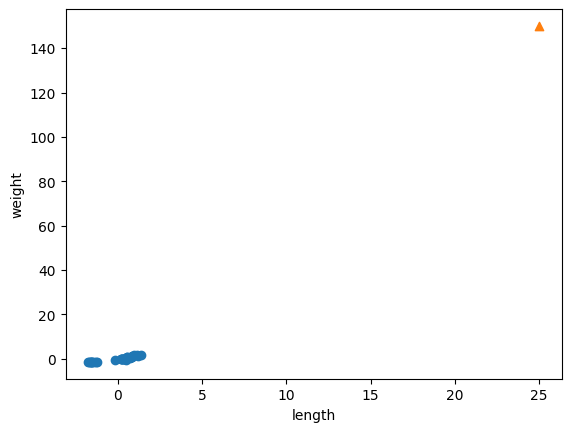

In [63]:
# 전처리 데이터를 이용해서 모델 훈련 시키기
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25,150,marker='^')  # 추가 데이터
plt.xlabel("length")
plt.ylabel("weight")
plt.show()
# 오른쪽 맨 꼭대기에 수상한 샘플 : 전처리된 데이터는 표준점수를 위해 값이 축소 돼있는데 알고자하는 값은 표준점수화가 안됐다.
# 훈련세트를 평균으로 빼고 표준편차로 나누어 주었기 때문ㅇㅔ 값의 범위가 달라졌다.

In [94]:
print(std) # [  9.98244253 323.29893931]
print(mean) # [ 27.29722222 454.09722222]
print([25,150]-mean) # [  -2.29722222 -304.09722222]
print(([25,150]-mean)/std) # [-0.23012627 -0.94060693]

[ 27.29722222 454.09722222]


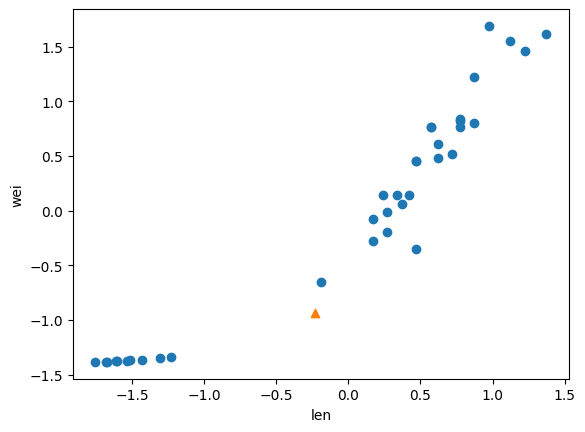

In [64]:
# 동일한 기준으로 샘플을 변환하고 출력
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')   # 배열로 생성하고 표준편차 적용 후 추가데이터
plt.xlabel('len')
plt.ylabel('wei')
plt.show()
# x, y축의 범위가 비슷함 (-1.5 ~ 1.5 사이값)

In [65]:
# 훈련 시작
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [66]:
test_scaled = (test_input - mean) / std     # 표준점수화

In [67]:
kn.score = (test_scaled, test_target)   # 평가 진행
print(kn.predict([new]))    # 25,150짜리 결과 : [1,] 도미로 예측 성공

[1.]


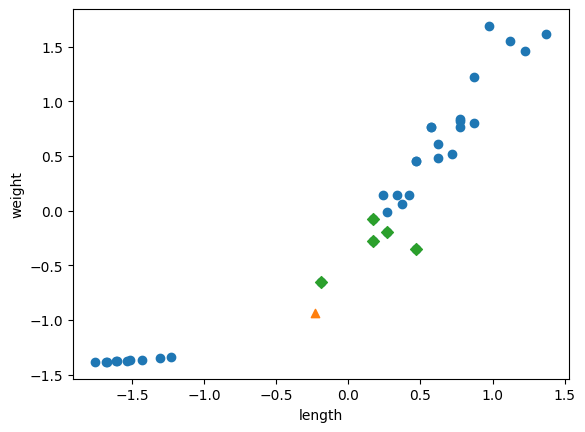

In [68]:
# kneighbors()로 최근접 이웃을 구한 다음 산점도로 그려봄
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0],new[1],marker='^')
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()